In [67]:
import pandas as pd
from great_tables import GT, md, style, loc

In [68]:
aug = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-09-23/fide_ratings_august.csv")
sep = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-09-23/fide_ratings_september.csv")

In [69]:
aug.head(2)

,id,name,fed,sex,title,wtitle,otitle,foa,rating,games,k,bday
0,53707043,A Darshil,IND,M,NaN,NaN,NaN,NaN,1412,4,40,2013
1,53200465,"A F M Ehteshamul, Hoque (tuhin",BAN,M,NaN,NaN,NaN,NaN,1797,0,40,1977


In [70]:
sep.head(2)

,id,name,fed,sex,title,wtitle,otitle,foa,rating,games,k,bday
0,53707043,A Darshil,IND,M,NaN,NaN,NaN,NaN,1412,0,40,2013
1,53200465,"A F M Ehteshamul, Hoque (tuhin",BAN,M,NaN,NaN,NaN,NaN,1797,0,40,1977


In [71]:
# Merge on id and adding suffixes
merged = pd.merge(
    aug,
    sep,
    on="id",
    suffixes=("_aug", "_sep")
)

In [72]:
# Select columns
merged = merged[["id", "name_sep", "bday_sep", "sex_sep", "fed_sep", "rating_aug", "rating_sep"]]

In [73]:
# Calculate rating change
merged.loc[:, "rating_change"] = merged["rating_sep"] - merged["rating_aug"]

In [74]:
# Rating ranks
merged["rank_aug"] = merged["rating_aug"].rank(method="dense", ascending=False)
merged["rank_sep"] = merged["rating_sep"].rank(method="dense", ascending=False)

In [75]:
# Top 10 male improvers 
merged_male = merged[merged["sex_sep"]=="M"]
top_improvers_male = merged_male.sort_values("rating_change", ascending=False).head(10)

In [76]:
# Top 10 female improvers 
merged_female = merged[merged["sex_sep"]=="F"]
top_improvers_female = merged_female.sort_values("rating_change", ascending=False).head(10)

In [77]:
# Concat male and female top improvers
df = pd.concat([top_improvers_male, top_improvers_female], axis=0, ignore_index=True)

In [78]:
# Ranking change
df["rank_change"] = df["rank_aug"] - df["rank_sep"]

In [79]:
# Calculate age
df["age"] = 2025-df["bday_sep"]
df["age"] = df["age"].apply(lambda x: str(x) + " years old")

In [80]:
# Select columns
df = df[["fed_sep", "name_sep", "age", "sex_sep", "rating_sep", "rating_change", "rank_sep", "rank_change"]]

In [81]:
# Convert float to integer
df[["rank_sep", "rank_change"]] = df[["rank_sep", "rank_change"]].astype(int)

In [82]:
# Sort values by rank
df = df.sort_values(by="rank_sep", ignore_index=True)

In [83]:
# Reverses the order of names
df["name"] = df["name_sep"].apply(lambda name: " ".join(name.split(", ")[::-1])) 

In [84]:
# Select columns
df = df[["rank_change", "rank_sep", "name", "age", "sex_sep", "fed_sep", "rating_sep", "rating_change"]]

In [85]:
# Triangle Unicode character 
triangle_unicode = "▲"
# Add triangle to each row of rank change
df["rank_change"] = triangle_unicode + " " + df["rank_change"].astype(str) 
# Add + each row of rating change
df["rating_change"] = "+ " + df["rating_change"].astype(str) 

In [86]:
# Sort values by rank change
df = df.sort_values(by="rank_change", ascending=False, ignore_index=True)

In [87]:
df

,rank_change,rank_sep,name,age,sex_sep,fed_sep,rating_sep,rating_change
0,▲ 672,454,Ivan Montes Molina,16 years old,M,ESP,2242,+ 669
1,▲ 552,738,David Gil Jimenez,18 years old,M,ESP,1958,+ 549
2,▲ 412,795,Jofre Dea Ruiz,14 years old,M,ESP,1901,+ 409
3,▲ 399,736,Finn Schell,17 years old,M,ENG,1960,+ 396
4,▲ 365,846,David Plzak,16 years old,M,CZE,1850,+ 362
5,▲ 364,619,Nurali Mussauly,14 years old,M,KAZ,2077,+ 361
6,▲ 352,864,Dhairya Amit Shroff,9 years old,M,CAN,1832,+ 349
7,▲ 328,728,Guilherme De Moura Silva,15 years old,M,BRA,1968,+ 325
8,▲ 302,277,Edgar Andreasyan,17 years old,M,ARM,2419,+ 299
9,▲ 299,337,Artem Polkovnikyan,15 years old,M,RUS,2359,+ 296


▲ 672,454,Ivan Montes Molina,16 years old,M,,2242,+ 669
▲ 552,738,David Gil Jimenez,18 years old,M,,1958,+ 549
▲ 412,795,Jofre Dea Ruiz,14 years old,M,,1901,+ 409
▲ 399,736,Finn Schell,17 years old,M,,1960,+ 396
▲ 365,846,David Plzak,16 years old,M,,1850,+ 362
▲ 364,619,Nurali Mussauly,14 years old,M,,2077,+ 361
▲ 352,864,Dhairya Amit Shroff,9 years old,M,,1832,+ 349
▲ 328,728,Guilherme De Moura Silva,15 years old,M,,1968,+ 325
▲ 302,277,Edgar Andreasyan,17 years old,M,,2419,+ 299
▲ 299,337,Artem Polkovnikyan,15 years old,M,,2359,+ 296
▲ 240,470,Senem Gul Bassari,13 years old,F,,2226,+ 237

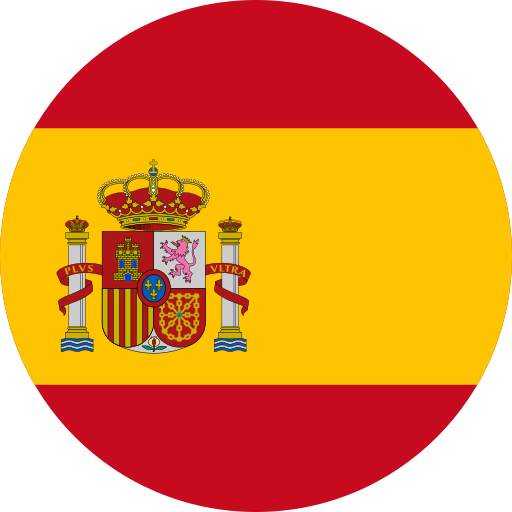
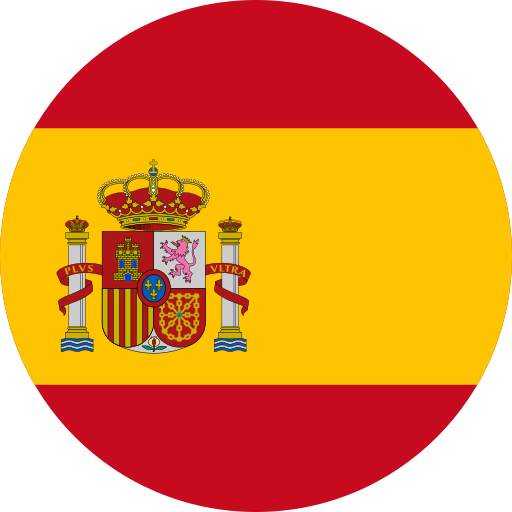
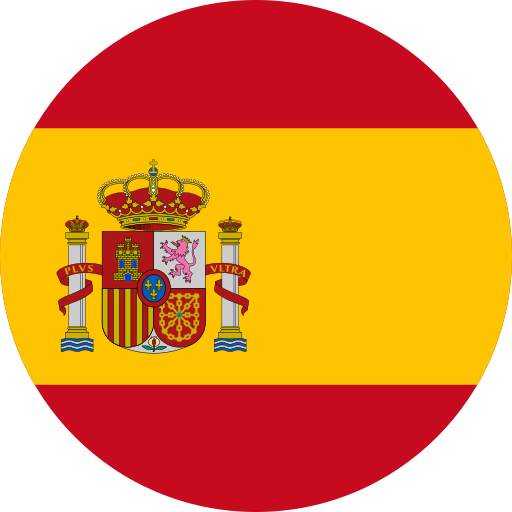
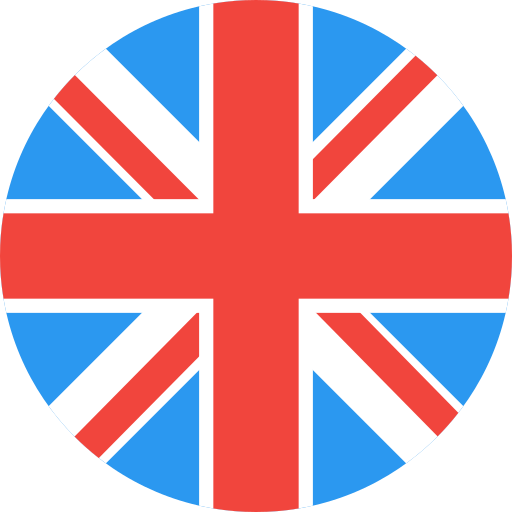
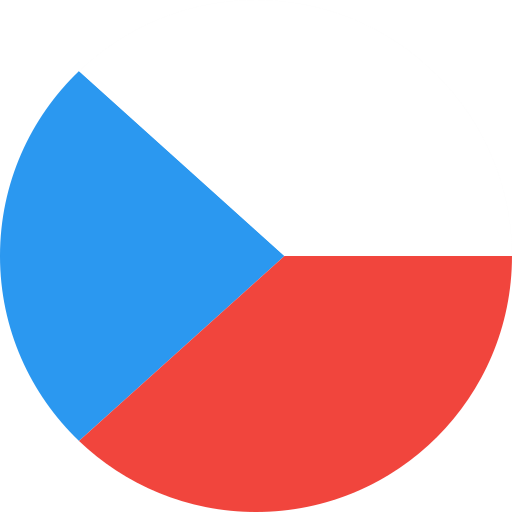
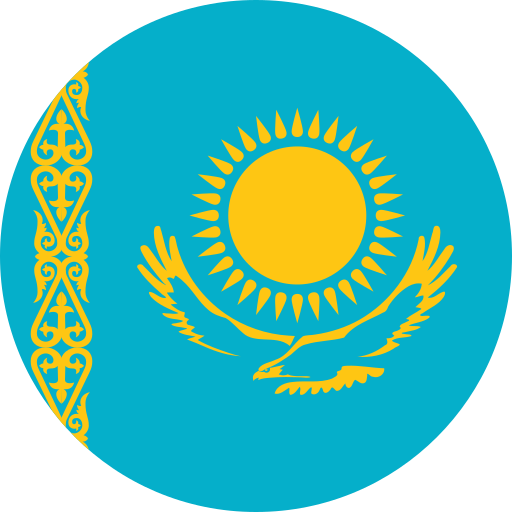
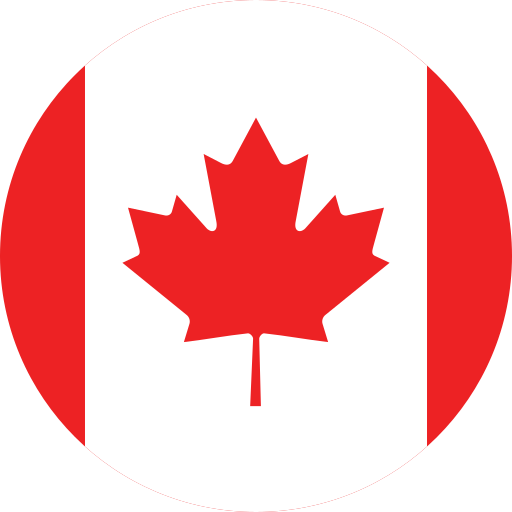
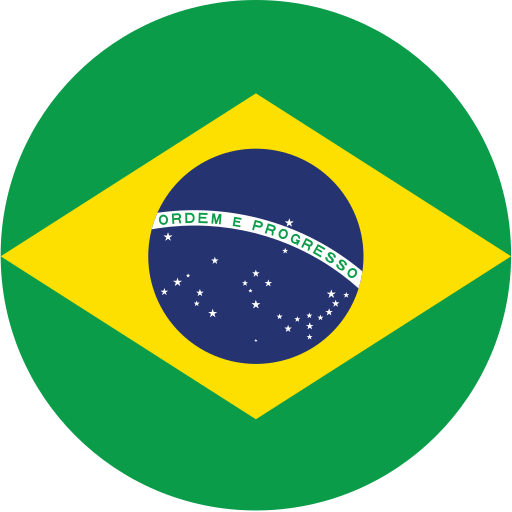
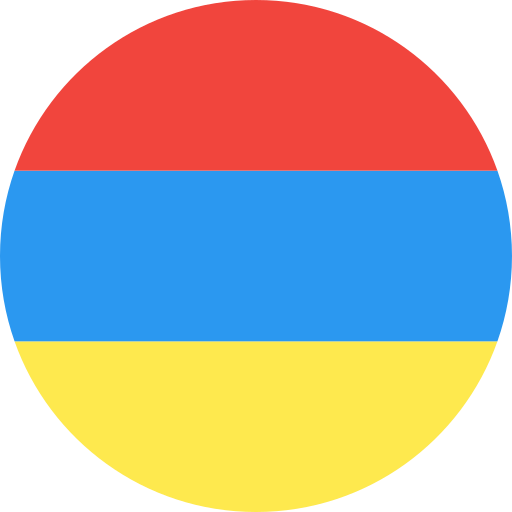
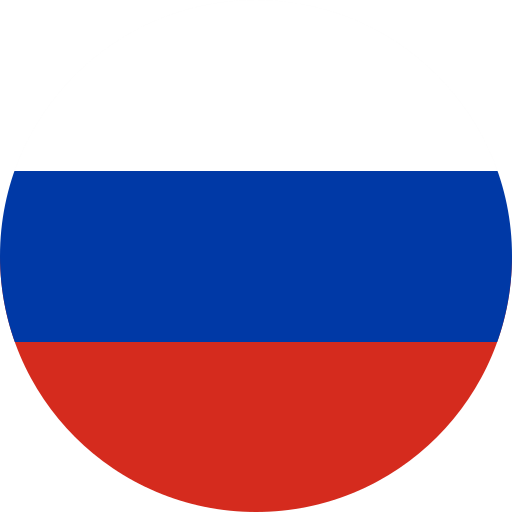
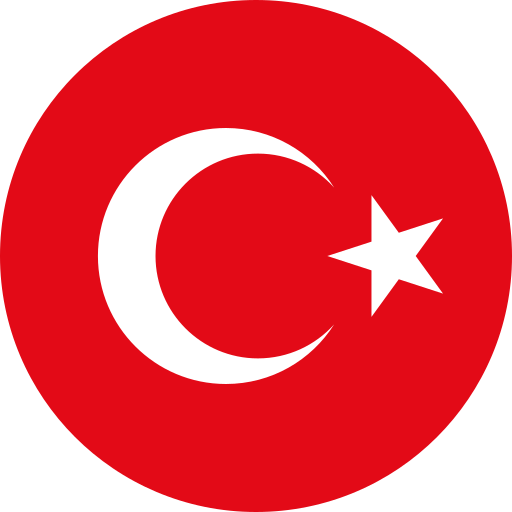
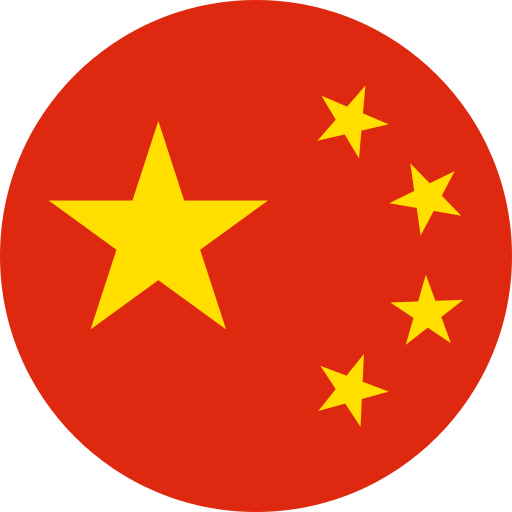
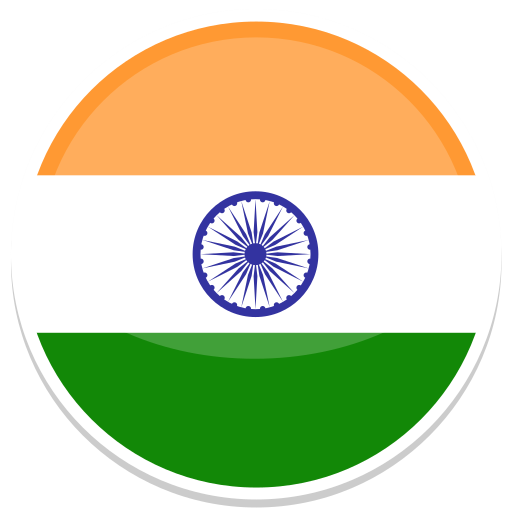
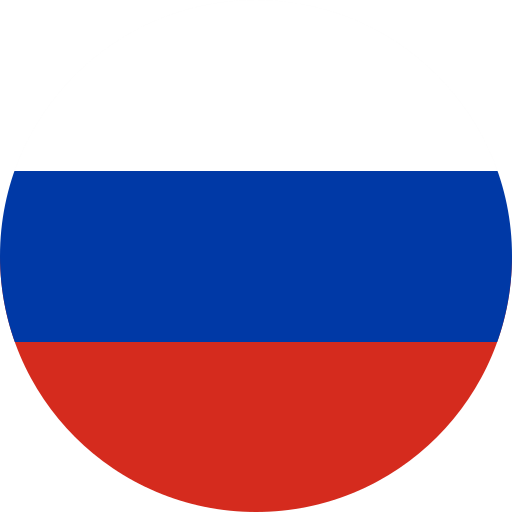
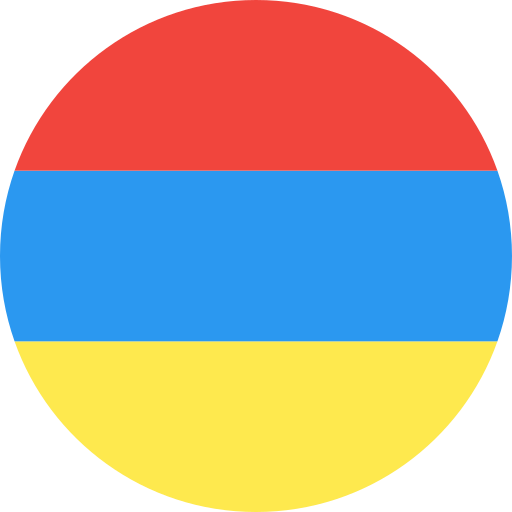
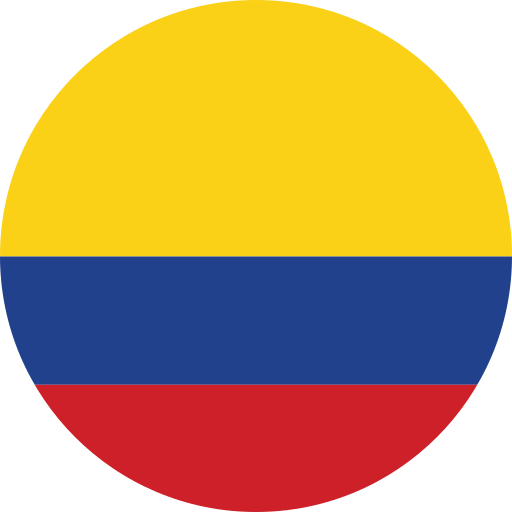
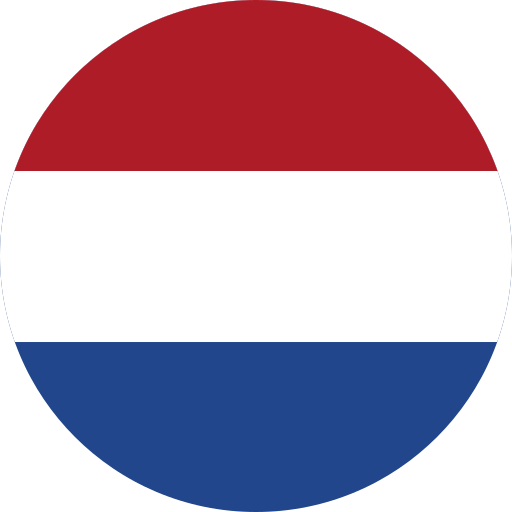
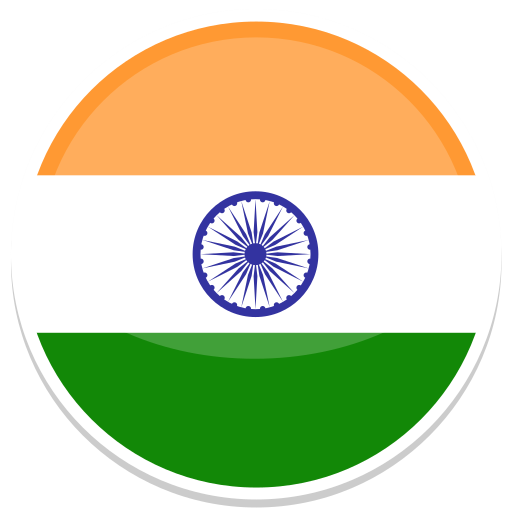
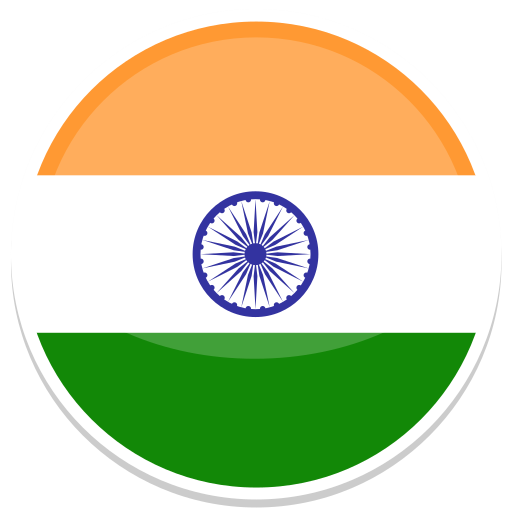
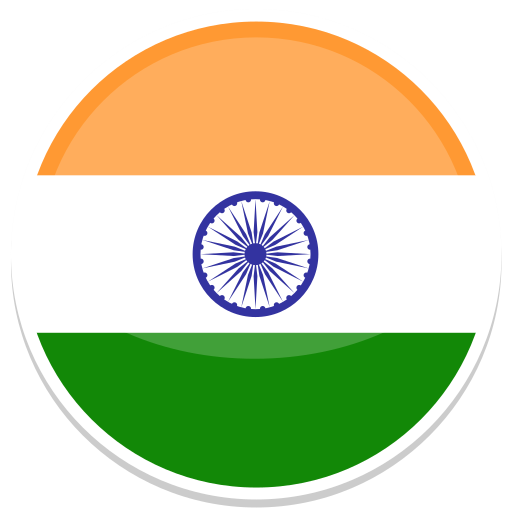

In [88]:
img_path = "FIDE.png"
flags_path = "flags"

# Reset the index to include it as a column
df = df.reset_index()  

table = (
    GT(df)
    .tab_header(
        title=md(f"![Header Image]({img_path}) <br> Youth players made the greatest gains from August to September"),
        subtitle=md("Top male and female performers: FIDE September 2025 biggest ranking and rating gains")
    )    
    .tab_style(
        style=style.fill(color="#eec242"),        
        locations=loc.header()
    )
    .tab_style(        
        style=style.borders(sides=["top", "bottom", "left", "top"], color="#eec242", weight="2px"),
        locations=loc.header()
    )
    .tab_style(
        style=style.text(color="#0a046a", size="xx-large", weight="bold"),
        locations=loc.title()
    )
    .tab_style(
        style=style.text(color="#0a046a", size="large", weight="bold"),
        locations=loc.subtitle()    
    )
    .tab_spanner(
        label="Ranking",
        columns=["rank_change", "rank_sep"],
    )
    .tab_spanner(
        label="Personal info",
        columns=["name", "age", "sex_sep", "fed_sep"],
    )
    .tab_spanner(
        label="Rating",
        columns=["rating_sep", "rating_change"],
    )    
    .fmt_image(
        columns="fed_sep", 
        path=flags_path, 
        file_pattern="{}.png"  # {} replaces each fed rows with the country flag
        )
    .cols_label(
        index="Index",
        rank_change="Ranking change",
        rank_sep="Rank",        
        name="Name",
        age="Age",
        sex_sep="Gender",
        fed_sep="Federation",
        rating_sep="Rating",
        rating_change="Rating change"
    )
    .cols_align(
        align="center"
    )   
    .tab_style(
        style=[
            style.text(color="#f2f0e3", weight="bold"),
            style.fill(color="#292923")
        ],
        locations=loc.column_header()
    )
    .tab_style(        
        style=style.borders(sides=["top", "bottom", "left", "top"], color="#292923", weight="2px"),
        locations=loc.column_header()
    )
    .tab_style(
        style=style.text(color="#eec242", weight="bold"),  
        locations=loc.body(["rank_sep", "rating_sep"])
    )
    .tab_style(
        style=style.text(color="#49e45d", weight="bold"),  
        locations=loc.body(["rank_change", "rating_change"])
    )       
    .tab_style(
        style=[
            style.fill(color="#3d3d3d"),  
            style.borders(sides=["top", "bottom", "left", "top"], color="#3d3d3d", weight="2px")
        ],
        locations=loc.body(rows=lambda D: D['index'] % 2 == 0)  # Even rows
    )
    .tab_style(
        style=[
            style.fill(color="#292923"),  
            style.borders(sides=["top", "bottom", "left", "top"], color="#292923", weight="2px")
        ],
        locations=loc.body(rows=lambda D: D['index'] % 2 != 0)  # Odd rows
    )
    .cols_hide(columns="index")
    .tab_style(
        style=style.text(color="#f2f0e3", weight="bold"),     
        locations=loc.body(columns=["name", "age", "sex_sep"])  
    )
    .tab_source_note(
        md("Data: TidyTuesday (FIDE Chess Player Ratings) | Design: Bernadett Piros")
    )  
    .tab_source_note(
        md("FIDE logo: pngegg.com | Flags: flaticon.com")
    )
    .tab_style(
        style=[
            style.text(color="#0a046a", size="small", weight="bold", align="center"),
            style.fill(color="#eec242"),  
            style.borders(sides=["top", "bottom", "left", "top"], color="#eec242", weight="2px")
        ],
        locations=loc.source_notes()
    )
)
table